In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("./data_file/weather_data.csv")
df

,Date,Temperature,Humidity,Rainfall
0,2025-01-01,15,80,0
1,2025-01-02,18,70,0
2,2025-01-03,20,65,5
3,2025-01-04,10,90,12
4,2025-01-05,25,60,0
5,2025-02-01,28,55,0
6,2025-02-02,30,50,8
7,2025-02-03,22,70,15
8,2025-02-04,18,75,2
9,2025-02-05,16,85,0


In [8]:
### Hottest & Coldest day
hottest_day = df.loc[df["Temperature"].idxmax()]
print(f"hottest day is : \n {hottest_day}\n")
coldest_day = df.loc[df["Temperature"].idxmin()]
print(f"coldest day is : \n{coldest_day}")

hottest day is : 
 Date           2025-02-02
Temperature            30
Humidity               50
Rainfall                8
Name: 6, dtype: object

coldest day is : 
Date           2025-01-04
Temperature            10
Humidity               90
Rainfall               12
Name: 3, dtype: object


In [9]:
### Monthly averages
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month_name()
monthly_avg = df.groupby(["Month"])[["Temperature","Humidity","Rainfall"]].mean()
monthly_avg

,Temperature,Humidity,Rainfall
Month,,,
February,22.8,67.0,5.0
January,17.6,73.0,3.4


In [10]:
### Extreme events
max_rain = df.loc[df["Rainfall"].idxmax()]
max_rain

Date           2025-02-03 00:00:00
Temperature                     22
Humidity                        70
Rainfall                        15
Month                     February
Name: 7, dtype: object

In [11]:
high_Humidity = df[df["Humidity"] > 85]
high_Humidity

,Date,Temperature,Humidity,Rainfall,Month
3,2025-01-04,10,90,12,January


Text(0, 0.5, 'Temperature (°C)')

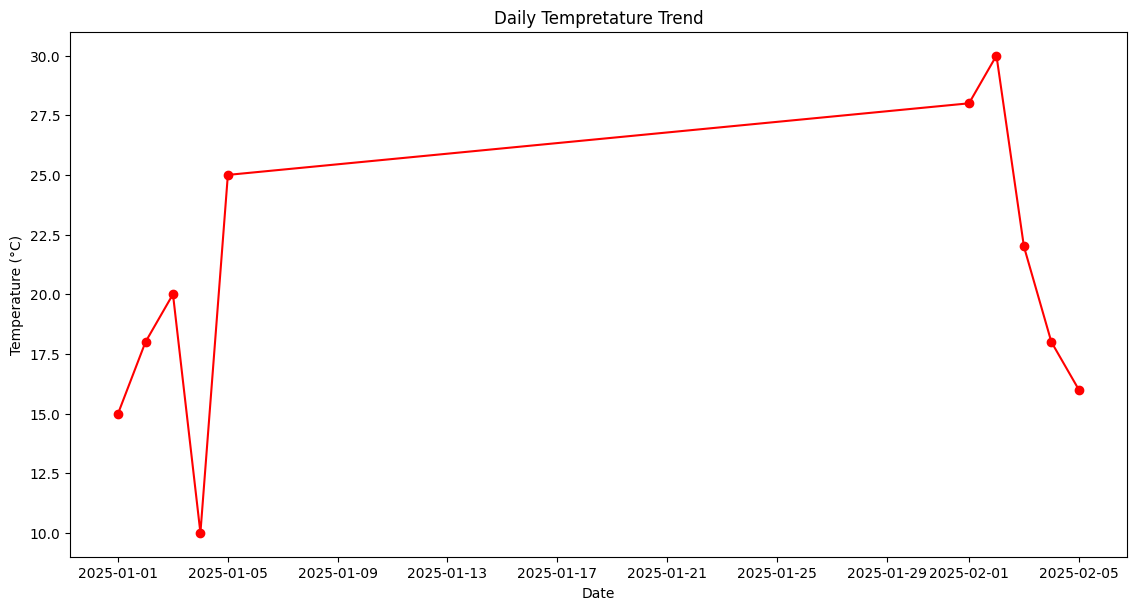

In [28]:
# 1. Temperature trend line

plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.plot(df["Date"],df["Temperature"],marker="o",color="red")
plt.title("Daily Tempretature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6156\1293163996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg["Temperature"], palette="coolwarm")


Text(0.5, 1.0, 'Monthly Avg Temperature')

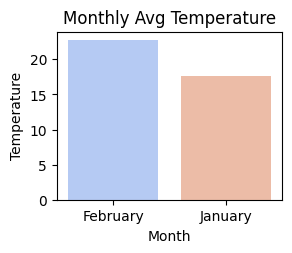

In [ ]:
# 2. Monthly average temperature (bar chart)
plt.subplot(2,2,2)
sns.barplot(x=monthly_avg.index, y=monthly_avg["Temperature"], palette="coolwarm")
plt.title("Monthly Avg Temperature")

Text(0, 0.5, 'Rainfall (mm)')

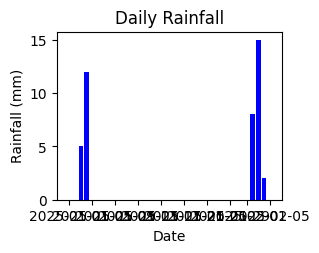

In [49]:
plt.subplot(2,2,3)
plt.bar(df["Date"],df["Rainfall"],color="blue")
plt.title("Daily Rainfall")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")

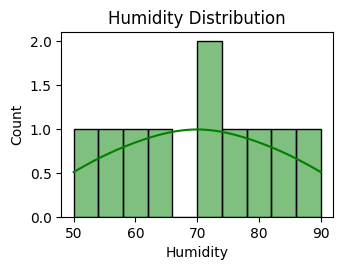

In [51]:
# 4. Humidity distribution
plt.subplot(2,2,4)
sns.histplot(df["Humidity"], bins=10, kde=True, color="green")
plt.title("Humidity Distribution")
plt.tight_layout()
plt.show()